In [10]:
!TORCH_DISTRIBUTED_DEBUG=DETAIL CUDA_VISIBLE_DEVICES=4,5 torchrun --nproc_per_node=2 --master_port=29501 module13/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient25_freeze_gd --epochs=200 --pre_norm

W0325 17:45:26.183000 3871285 site-packages/torch/distributed/run.py:793] 
W0325 17:45:26.183000 3871285 site-packages/torch/distributed/run.py:793] *****************************************
W0325 17:45:26.183000 3871285 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0325 17:45:26.183000 3871285 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
0
1
Epoch: 1 Train loss: 16.796 Aux train loss: 9.960 Val loss: 6.200 Aux val loss: 3.724 Train MAE: 55.649 Val MAE: 33.718 Epoch time: 190.854 seconds best
Epoch: 2 Train loss: 14.997 Aux train loss: 9.028 Val loss: 5.880 Aux val loss: 3.

In [11]:
!CUDA_VISIBLE_DEVICES=5 torchrun --nproc_per_node=1 --master_port=29501 module13/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient25_freeze_gd --epochs=200 --pre_norm

Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Val set MAE: 11.91 RMSE: 34.22
GT count: tensor([30.,  8.], device='cuda:0')
Predicted count: tensor([26.3264,  8.4674], device='cuda:0')
Test set MAE: 12.44 RMSE: 78.10
GT count: tensor([17., 34.], device='cuda:0')
Predicted count: tensor([19.7916, 25.2620], device='cuda:0')



5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
181       8.8280         
197       9.1410         
198       9.1865         
177       9.2939         
200       9.3460         

Validation MAE:
Epoch     MAE            
-------------------------
151       11.9059        
149       12.0337        
191       12.0503        
135       12.0673        
79        12.1370        


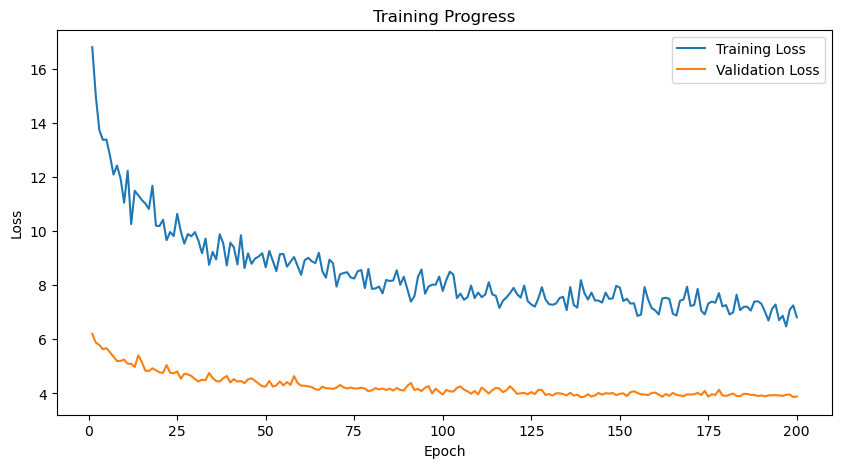

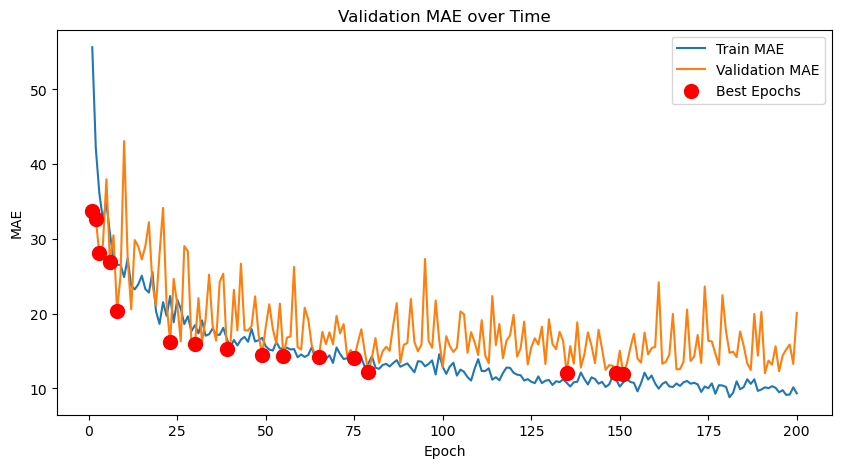

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient25_freeze_gd.csv')

# df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Train MAE'], label='Train MAE')
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()